# Introduction


In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

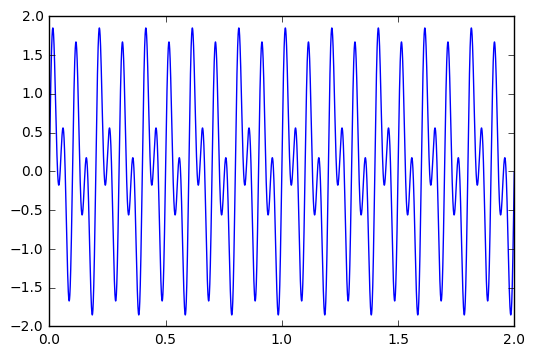

In [153]:
fs = 16000 # Sampling rate in Hz
duration = 2 # Duration in seconds
amps = np.asarray([0.2, 1, 1]) # Amplitudes of sinusoids 
freqs = np.asarray([5, 10, 20]) # Frequencies of sinusoids


def create_signal():
    t = np.arange(0, duration, 1 / fs, dtype=np.float64)
    s = np.zeros(len(t))
    k = []
    for f, a in zip(freqs, amps):
        sinusoid = a * np.sin(2 * np.pi * f * t)
        s += sinusoid
        k.append(sinusoid)
    return s, t, k

s, t, raw = create_signal()
plt.plot(t, s)
plt.show()

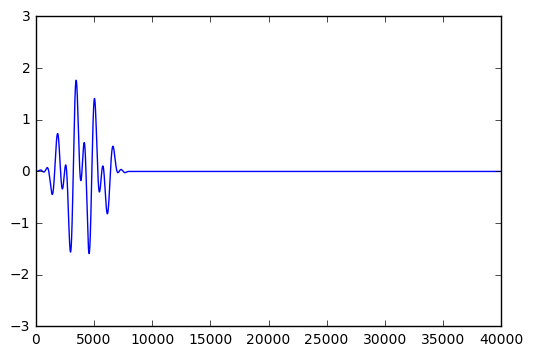

In [161]:
window_span = 0.5 # Seconds the window captures
pad_span = 2. # Seconds the window is padded with extra zeros
ndata = int(window_span * fs) # Samples captured in window
npad = int(pad_span * fs) # Additional samples added by zero padding

w = s[:ndata]
wfun = np.hanning(ndata)
#wfun = np.full(ndata, 1.)
wfun_norm = 1. / np.average(wfun)

w = w * wfun
w = np.append(w, np.zeros(npad))

plt.plot(w)
plt.ylim([-3, 3])
plt.show()

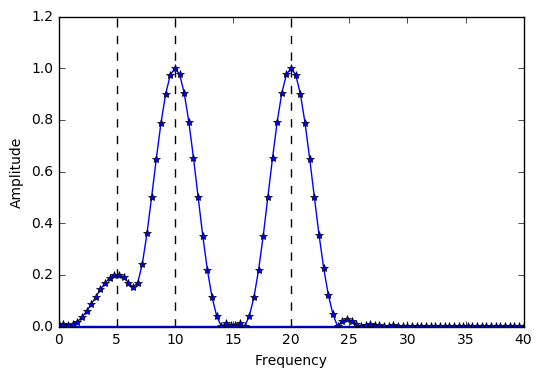

In [162]:
fft = np.abs(np.fft.fft(w)) * (2. * wfun_norm/(ndata))
xlabels = np.fft.fftfreq(len(w), d=1. / fs)

plt.plot(xlabels, fft, marker='*')
plt.xlim([0, 40])
for f in freqs:
    plt.axvline(x=f, linewidth=1, linestyle='--', color='k')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()